In [1]:
from lppls import lppls_cmaes
import yfinance as yf
import numpy as np
import pandas as pd
from datetime import datetime as dt
%matplotlib inline

In [2]:
# Download S&P 500 historical data
data = yf.download('nlr', start='2022-01-01', progress=False)

In [3]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-10-10,85.389999,85.839996,84.870003,85.730003,85.730003,47800
2024-10-11,85.010002,86.839996,84.400002,86.779999,86.779999,177200
2024-10-14,86.820000,87.860001,86.250000,87.839996,87.839996,72000
2024-10-15,88.400002,88.500000,86.690002,88.129997,88.129997,122000
2024-10-16,89.510002,95.864998,89.000000,94.440002,94.440002,488359


<Axes: xlabel='Date'>

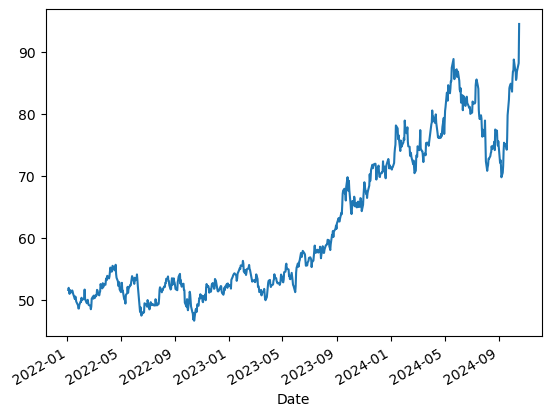

In [4]:
data['Adj Close'].plot()

In [5]:
# convert time to ordinal
time = [pd.Timestamp.toordinal(t1) for t1 in data.index]

In [6]:
time[:10]

[738158,
 738159,
 738160,
 738161,
 738162,
 738165,
 738166,
 738167,
 738168,
 738169]

In [7]:
# create list of observation data
price = np.log(data['Adj Close'].values)
# normalized_priced = price / np.max(price)

In [8]:
price[:10]

array([3.94418279, 3.95087179, 3.94527051, 3.93195525, 3.94363844,
       3.93671807, 3.93836147, 3.94273059, 3.93890862, 3.93250599])

In [9]:
# create observations array (expected format for LPPLS observations)
observations = np.array([time, price])

In [10]:
observations.shape

(2, 701)

In [11]:
# for _ in range(5):
#     lppls_model = lppls_cmaes.LPPLSCMAES(observations=observations)
#     tc, m, w, a, b, c, c1, c2, O, D = lppls_model.fit(max_iteration=2500, pop_size=4)
#     print(pd.Timestamp.fromordinal(int(tc)))

In [16]:
lppls_model = lppls_cmaes.LPPLSCMAES(observations=observations)
tc, m, w, a, b, c, c1, c2, O, D = lppls_model.fit(max_iteration=5000, pop_size=4, factor_sigma=0.03)
print(pd.Timestamp.fromordinal(int(tc)))

(80_w,160)-aCMA-ES (mu_w=42.4,w_1=5%) in dimension 3 (seed=247724, Thu Oct 17 10:28:05 2024)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1    160 2.671455859036637e-01 1.0e+00 9.50e-01  2e-02  1e+04 0:00.0
    2    320 2.673185488935463e-01 2.1e+00 9.07e-01  2e-02  1e+04 0:00.1
    3    480 2.676064978064122e-01 2.4e+00 8.87e-01  2e-02  1e+04 0:00.2
   51   8160 2.601320764394841e-01 1.7e+03 2.60e+01  2e-07  2e-04 0:02.7
2025-07-25 00:00:00


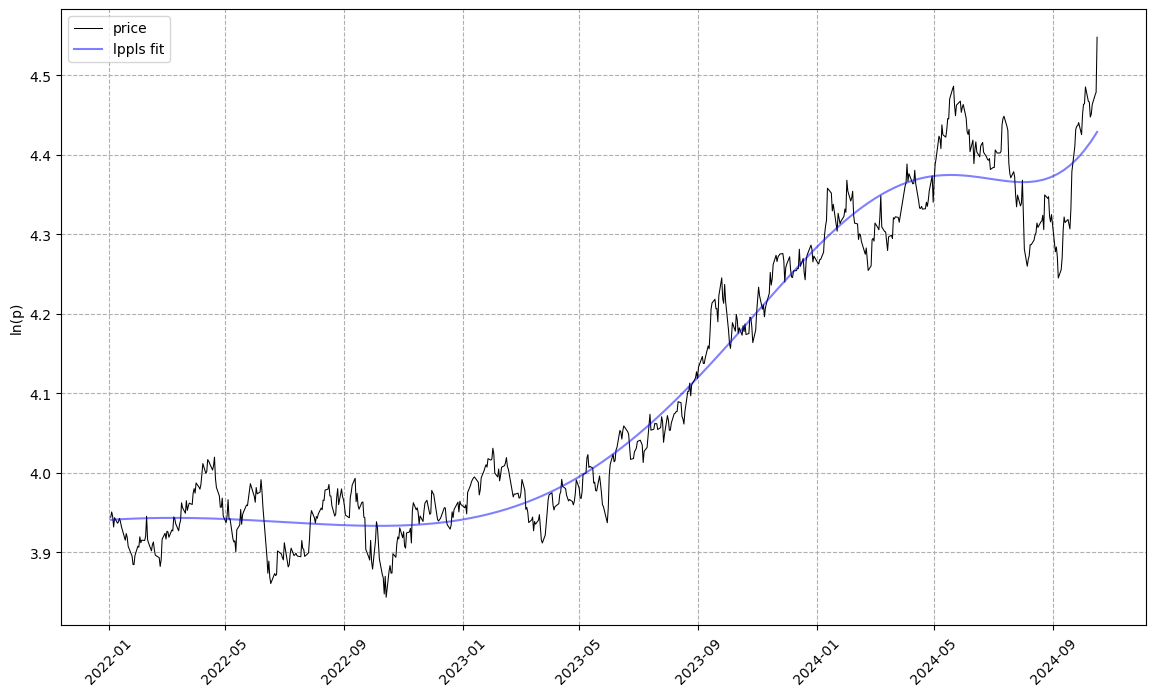

In [17]:
# visualize the fit
lppls_model.plot_fit()